# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [33]:
import requests
from matplotlib import pyplot as plt
import pandas as pd
from api_keys import weather_api_key
import json
import numpy as np
import csv
from datetime import datetime
from citipy import citipy

#needing a csv file to output results into
output_file='../output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
#lets try the citipy starter code
# List for holding lat_lngs and cities
lat_lngs = []
cities_list = []

# Create a set of 1,500 random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count
len(cities_list)


593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# Specify the URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f'{url}appid={weather_api_key}&q='
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=7eb04e06eacb8390017cc31d08e2137c&q=


In [6]:
# Loop through the list of cities .. Perform a weather check on each city using a series of successive API calls.
#set up fields to capture information:
city_name = []
city_id=[]
lat=[]
lon=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
w_date=[]

for city in cities_list:
    try:
        response=requests.get(query_url + city).json()
    
# Get fields from JSON response

        cityid = response['id']
        city_id.append(cityid)
        city_name.append(city)
      
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country']) 
        w_date.append(response['dt'])  
     
        print(f" processing record for {city}, City ID of {cityid}")
    except:
        print(f" processing stopped for {city}, no weather record")    

           
    

 processing record for lebu, City ID of 3883457
 processing record for buriti bravo, City ID of 3404722
 processing record for mogadishu, City ID of 53654
 processing record for khatanga, City ID of 2022572
 processing record for torbay, City ID of 6167817
 processing record for bambous virieux, City ID of 1106677
 processing record for arraial do cabo, City ID of 3471451
 processing record for katobu, City ID of 1640972
 processing record for punta arenas, City ID of 3874787
 processing record for thompson, City ID of 6165406
 processing record for mataura, City ID of 6201424
 processing record for victoria, City ID of 1819729
 processing record for lagoa, City ID of 3372964
 processing record for cape town, City ID of 3369157
 processing record for kununurra, City ID of 2068110
 processing record for les cayes, City ID of 3728097
 processing record for rosarito, City ID of 3988392
 processing record for dabhoi, City ID of 1273766
 processing record for krasnoarmeysk, City ID of 54246

 processing record for sitka, City ID of 5557293
 processing stopped for cockburn harbour, no weather record
 processing record for carnarvon, City ID of 2074865
 processing record for port lincoln, City ID of 2063036
 processing record for bereda, City ID of 3105522
 processing record for palmer, City ID of 4946620
 processing record for benguela, City ID of 3351663
 processing record for yellowknife, City ID of 6185377
 processing record for tasiilaq, City ID of 3424607
 processing record for fukue, City ID of 1863997
 processing record for nome, City ID of 5870133
 processing record for lamar, City ID of 4705086
 processing record for castro, City ID of 3466704
 processing record for georgetown, City ID of 1735106
 processing record for fort frances, City ID of 5955826
 processing record for mantua, City ID of 3174050
 processing record for tuktoyaktuk, City ID of 6170031
 processing record for merauke, City ID of 2082539
 processing record for pringsewu, City ID of 1630639
 process

 processing record for shimoda, City ID of 1852357
 processing record for balikpapan, City ID of 1650527
 processing record for codrington, City ID of 2171099
 processing stopped for bolungarvik, no weather record
 processing record for chicama, City ID of 3698359
 processing record for ilo, City ID of 3938415
 processing record for honiara, City ID of 2108502
 processing record for oriximina, City ID of 3393471
 processing record for tagusao, City ID of 1684245
 processing record for auki, City ID of 2109701
 processing record for nouadhibou, City ID of 2377457
 processing record for sept-iles, City ID of 6144312
 processing record for salalah, City ID of 286621
 processing record for vigrestad, City ID of 3131824
 processing record for salgado, City ID of 3450710
 processing record for port alfred, City ID of 964432
 processing stopped for vaitupu, no weather record
 processing record for port hedland, City ID of 2063042
 processing record for omboue, City ID of 2396853
 processing r

 processing record for buala, City ID of 2109528
 processing stopped for yunjinghong, no weather record
 processing record for springfield, City ID of 4409896
 processing record for south venice, City ID of 4173593
 processing record for mattru, City ID of 2409215
 processing record for ambulu, City ID of 1621313
 processing record for varhaug, City ID of 3132644
 processing record for karatuzskoye, City ID of 1504442
 processing record for twentynine palms, City ID of 5404198
 processing record for lima, City ID of 3936456
 processing record for zarechnyy, City ID of 464625
 processing record for sampit, City ID of 1628884
 processing record for chapais, City ID of 5919850
 processing record for mezen, City ID of 527321
 processing record for eureka, City ID of 5563397
 processing record for shitanjing, City ID of 1794971
 processing record for lompoc, City ID of 5367788
 processing record for mitsamiouli, City ID of 921786
 processing record for the valley, City ID of 3573374
 proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# convert dates from UNIX
converted_date=[]
for time_date in w_date:
    converted_date.append(datetime.fromtimestamp(int(time_date)).strftime('%m/%d/%Y'))
converted_date[0:5]

['01/07/2021', '01/07/2021', '01/07/2021', '01/07/2021', '01/07/2021']

In [37]:
# dictionary of lists  

dict = {'City Name': city_name, 'City ID': city_id, 'Lat': lat, 'Lon': lon, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind speed': wind_speed, 'Country': country, 'Date':converted_date}  
    
weather_results = pd.DataFrame(dict) 

#output data to csv
weather_results.to_csv(output_file)
weather_results.head()


,City Name,City ID,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,lebu,3883457,-37.6167,-73.6500,287.72,92,33,5.92,CL,01/07/2021
1,buriti bravo,3404722,-5.8372,-43.8336,294.14,92,0,1.39,BR,01/07/2021
2,mogadishu,53654,2.0371,45.3438,298.15,65,90,5.70,SO,01/07/2021
3,khatanga,2022572,71.9667,102.5000,258.45,93,100,11.59,RU,01/07/2021
4,torbay,6167817,47.6666,-52.7314,280.15,100,90,4.60,CA,01/07/2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
# any cities with high humidity  ie: > 100%
print(weather_results.loc[weather_results['Humidity']>100])


Empty DataFrame
Columns: [City Name, City ID, Lat, Lon, Max Temp, Humidity, Cloudiness, Wind speed, Country, Date]
Index: []


In [39]:
#  Get the indices of cities that have humidity over 100%.


In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

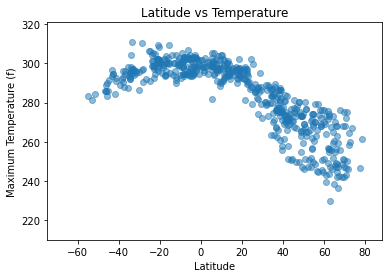

In [52]:
# Create a scatter plot which compares Lattitude to Temperature
# Create a scatter plot which compares Lattitude to Temperature
x_values = weather_results['Lat']
y_values = weather_results['Max Temp']
plt.scatter(x_values,y_values, alpha=0.50)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (f)')
plt.title('Latitude vs Temperature')
plt.ylim(min(y_values)-20,max(y_values)+10)
plt.xlim(min(x_values)-20,max(x_values)+10)
plt.show()

## Latitude vs. Humidity Plot

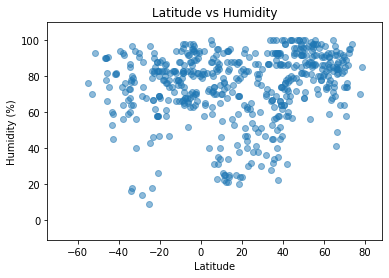

In [69]:
# Create a scatter plot which compares Lattitude to Humidity
x_values = weather_results['Lat']
y_values = weather_results['Humidity']
plt.scatter(x_values,y_values, alpha=0.50)
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(min(y_values)-20,max(y_values)+10)
plt.xlim(min(x_values)-20,max(x_values)+10)
plt.show()

## Latitude vs. Cloudiness Plot

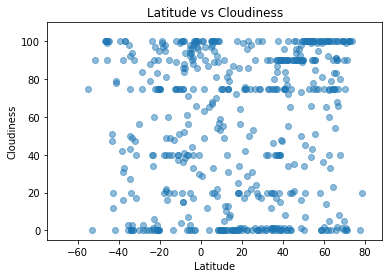

In [70]:
# Create a scatter plot which compares Lattitude to Cloudiness
x_values=weather_results['Lat']
y_values = weather_results['Cloudiness']
plt.scatter(x_values,y_values, alpha=0.50)
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(min(y_values)-5,max(y_values)+10)
plt.xlim(min(x_values)-20,max(x_values)+10)
plt.show()

## Latitude vs. Wind Speed Plot

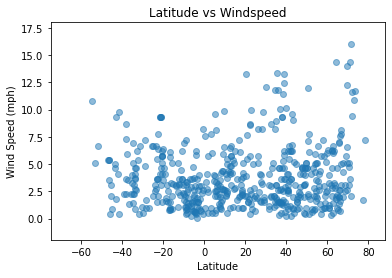

In [71]:
# Create a scatter plot which compares Lattitude to Windspeed
x_values=weather_results['Lat']
y_values = weather_results['Wind speed']
plt.scatter(x_values,y_values, alpha=0.50)
plt.title('Latitude vs Windspeed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(min(y_values)-2,max(y_values)+2)
plt.xlim(min(x_values)-20,max(x_values)+10)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression